Tensorflooooooow yeeeaaa!
tensorflow 1.x steps:
    |-> build computational graph
    |-> run a computational graph
tensorflow 2.x steps:
    |-> just run.

In [51]:
# tensorflow and numpy versions not properly compatible
import tensorflow as tf # I am using right now 2.0.beta1
import numpy as np # 1.17
import matplotlib.pyplot as plt

"hello world" applicaiton

In [52]:
hello_constant = tf.constant("hello world")
print(hello_constant)

# TensorFlow 2
hello = tf.constant("hello")
world = tf.constant(" world")
print(hello + world)

tf.Tensor(b'hello world', shape=(), dtype=string)
tf.Tensor(b'hello world', shape=(), dtype=string)


# TensorFlow 1.X
session = tf.Session()
outputs = session.run(f(placeholder), feed_dict={placeholder: input})
...
session.close()
# TensorFlow 2.0
outputs = f(input)

In [53]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0, tf.float32)
print(tf.sqrt(node1**2+node2**2)) # tf 2.x

tf.Tensor(5.0, shape=(), dtype=float32)


# TensorFlow 1.X
tfvar1 = tf.Variable([.5], tf.float32)
# init = tf.global_variable_initializer()
# sess = tf.Session()
# sess.run(init)
# print(sess.run(tfvar1))

In [54]:
# TensorFlow 2.X
tfvar1 = tf.Variable([.5], tf.float32)
print(tfvar1)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.5], dtype=float32)>


Oh right! Let's make a simple linear equation
- W = weight
-b = bias
- x = slop(in tihs case)

In [55]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.9], tf.float32)
x = list(range(1,8))

linear_model = W*x + b
print(linear_model) # TensorFlow 2.X eager execution

tf.Tensor(
[-5.9999996e-01 -2.9999995e-01  5.9604645e-08  3.0000007e-01
  6.0000002e-01  9.0000010e-01  1.2000002e+00], shape=(7,), dtype=float32)


Tensorflow common mathematics operations

In [56]:
print(tf.add(5, 2))
print(tf.subtract(5, 2))
print(tf.multiply(5, 2))

tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


Tensorflow common data types

In [57]:
print(f"Tensorflow\nBefore type casting {tf.constant(2)}\n After type casting: {tf.cast(tf.constant(2), tf.int8).dtype}")

Tensorflow
Before type casting 2
 After type casting: <dtype: 'int8'>


# Activation(transformation) functions
Activation(transformation) functions provides non-linearity to linear functions.
- # Types of activation functions
    1) Linear Identity <br>
    2) Unit or Binary Step <br>
    3) Sigmoid or Logistic ( *** ) <br>
    4) Tanh ( * ) <br>
    5) ReLU ( ** ) <br>
    6) Softmax <br>

Some Activation function without tensorflow
I've separated the charts to look cleaner

In [58]:
def linear_(a):
    return a # identical
def step_(a):
    return np.heaviside(a, 0.5) # 0.5 * (np.sign(a) + 1)
def sigmoid_(a):
    beta = 1 # almost always one
    return 1/(1+np.exp(beta*-a))
def tanh_(a):
    return np.tanh(a) # (np.exp(a) - np.exp(-a)) / (np.exp(a) + np.exp(-a))
def ReLU_(a):
    return np.maximum(0,a)
def softmax_(a):
    eq = np.exp(a) / np.sum(np.exp(a), axis = 0)
    return  eq, np.sum(eq) # to show sum of output of equation

a = np.arange(-1,1,0.1)
lin = linear_(a)
st = step_(a)
sig = sigmoid_(a)
ta = tanh_(a)
re = ReLU_(a)
so, sum_so = softmax_(a)
print(f"linear: {lin}")
print(f"step: {st}")
print(f"sigmoid: {sig}")
print(f"tanh: {ta}")
print(f"ReLU: {re}")
print(f"softmax: {so}\nsum of softmax: {sum_so}")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('All activation functions', fontsize=16)
ax1.plot(a, lin)
ax1.plot(a, st)
ax1.plot(a, sig)
ax1.set_xlabel("values")
ax1.set_ylabel("output")
ax1.legend(["linear","step","sigmoid"])

ax2.plot(a, ta)
ax2.plot(a, re)
ax2.plot(a, so)
ax2.set_xlabel("values")
ax2.set_ylabel("output")
ax2.legend(["tanh","ReLU","softmax"])

plt.show()

linear: [-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
step: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
sigmoid: [0.26894142 0.2890505  0.31002552 0.33181223 0.35434369 0.37754067
 0.40131234 0.42555748 0.450166   0.47502081 0.5        0.52497919
 0.549834   0.57444252 0.59868766 0.62245933 0.64565631 0.66818777
 0.68997448 0.7109495 ]
tanh: [-7.61594156e-01 -7.16297870e-01 -6.64036770e-01 -6.04367777e-01
 -5.37049567e-01 -4.62117157e-01 -3.79948962e-01 -2.91312612e-01
 -1.97375320e-01 -9.96679946e-02 -2.22044605e-16  9.96679946e-02
  1.97375320e-01  2.91312612e-01  3.79948962e-01  4.62117157e-01
  5.37049567e-01  6.04367777e-01  6.64036770e-01  7.16297870e-01]
ReLU: [0.  0.  0.  0.  0.  0.  0

Tensorflow version of activation functions

In [59]:
a = tf.cast( np.arange(-2,3,1), tf.float32) # casting is important. Otherwise you will get "Could not find valid device for node." error.
sigmoid_act = tf.sigmoid(a)
tanh_act = tf.tanh(a)
relu_act = tf.nn.relu(a)
print(f"Sigmoid Activation: {sigmoid_act}")
print(f"Tanh Activation: {tanh_act}")
print(f"ReLU Activation: {relu_act}")

Sigmoid Activation: [0.11920291 0.26894143 0.5        0.7310586  0.880797  ]
Tanh Activation: [-0.9640276 -0.7615942  0.         0.7615942  0.9640276]
ReLU Activation: [0. 0. 0. 1. 2.]


Tensorflow random tensor
truncated_normal is now inside tf.random module

In [60]:
a = tf.random.truncated_normal([2, 3]) # tf 2.x
print(a)

tf.Tensor(
[[ 0.22351152 -1.1017632   1.5917729 ]
 [-0.45153564 -0.359336   -0.47737077]], shape=(2, 3), dtype=float32)


# Loss function
Loss is the difference or derivative of actual and predicted values.
In other words; it si measurement of measure of how far away we are from actual values.
Loss can be call as cost.

There is 2 types of data so that there is 2 types of loss function for continuous and discreate (or digital)
- MSE or squared error: continuous data, regression
- Cross entropy: discreate (or digital) data, classification

In [61]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = list(range(1,5))
y = list(range(0,-4,-1)) # predicted
linear_model = W * x + b
# Squared error = sum(actual - predicted)**2
squared_delta = tf.math.square(linear_model - y)
loss = tf.reduce_sum(squared_delta)
print(f"loss for continuous data: {loss}")

loss for continuous data: 23.660001754760742


# Optimizations (core of learning)
Optimization is the reduction of loss.
During optimization every weights of neural netowrks updated by every iterations(epoch).
Epoch is the how many iteration on dataset

Most known optimization tecnique is the gradient descent(GD). There is several gradient descent versions but for now I am using standart stochastic GD

old way(tf 1.x): </br>
W = tf.Variable([.5], tf.float32) </br> 
b = tf.Variable([.1], tf.float32) </br>
inputs = list(range(1,5)) </br> 
outputs = list(range(0,-4,-1)) # predicted </br>
linear_model = W * x + b </br> 
squared_delta = tf.math.square(linear_model - y) </br>
loss = tf.reduce_sum(squared_delta) </br>
print(f"loss for continuous data: {loss}") </br>
optimizer = tf.train.GradientDescentOptimizer(0.5) </br>
print(optimizer) </br>

Epoch  0: W=5.00 b=0.00, loss=25.00000
Epoch  1: W=4.00 b=0.04, loss=15.98981
Epoch  2: W=3.20 b=0.06, loss=10.23060
Epoch  3: W=2.56 b=0.07, loss=6.54811
Epoch  4: W=2.05 b=0.08, loss=4.19265
Epoch  5: W=1.64 b=0.08, loss=2.68548
Epoch  6: W=1.31 b=0.08, loss=1.72074
Epoch  7: W=1.05 b=0.07, loss=1.10300
Epoch  8: W=0.84 b=0.07, loss=0.70729
Epoch  9: W=0.67 b=0.06, loss=0.45372


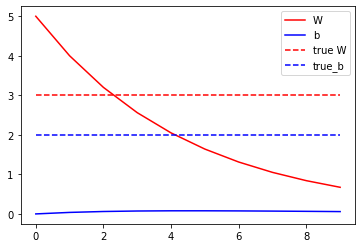

In [64]:
# thanks to: https://www.tensorflow.org/tutorials/eager/custom_training
# values are completely random in my mind
TRUE_W = 3.0
TRUE_b = 2.0

NUM_EXAMPLES = 1000
inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise # predicted

class Model(object):
    def __init__(self):
        self.W = tf.Variable([5.0], tf.float32)
        self.b = tf.Variable([0.0], tf.float32)
    def __call__(self, x):
        return self.W + self.b * x

# model = Model()
# assert model(3.0).numpy() == 15.0 # for a test

def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y, desired_y))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

model = Model()
# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show() # results may not as you excepted.